<a href="https://colab.research.google.com/github/kiera-dev/ACNH_Colab_SQL/blob/main/ACNH_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
!pip install duckdb

In [41]:
import duckdb, os
import pandas as pd

acnh_villagers_csv_path = "/content/drive/MyDrive/acnh_data/villagers.csv"
acnh_housewares_csv_path = "/content/drive/MyDrive/acnh_data/housewares.csv"

if os.path.exists(acnh_villagers_csv_path):
  print(f"Loading Villagers: {acnh_villagers_csv_path}")
  villagers_df = pd.read_csv(acnh_villagers_csv_path)
  # villagers_df = villagers_df.rename(columns={"Favorite Song": "favorite_song"})
  villagers_df = villagers_df.rename(columns=lambda x: x.lower().replace(' ', '_'))
  print(f"Loading Furniture: {acnh_housewares_csv_path}")
  housewares_df = pd.read_csv(acnh_housewares_csv_path)
else:
  print(f"Derp")

villagers_df
housewares_df

Loading Villagers: /content/drive/MyDrive/acnh_data/villagers.csv
Loading Furniture: /content/drive/MyDrive/acnh_data/housewares.csv


,Name,Variation,Body Title,Pattern,Pattern Title,DIY,Body Customize,Pattern Customize,Kit Cost,Buy,...,Interact,Tag,Outdoor,Speaker Type,Lighting Type,Catalog,Filename,Variant ID,Internal ID,Unique Entry ID
0,acoustic guitar,Natural,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,...,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_0_0,0_0,383,EpywQXABBcv2dipsP
1,acoustic guitar,Cherry,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,...,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_1_0,1_0,383,K9she5Y4SuXA8MGBR
2,acoustic guitar,Brown,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,...,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_2_0,2_0,383,vLq9iphAvALBXazDr
3,acoustic guitar,Blue,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,...,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_3_0,3_0,383,nuqeFzNE5PneqGHaj
4,acoustic guitar,White,Body,NaN,NaN,Yes,Yes,No,5.0,NFS,...,Yes,Musical Instrument,No,Does not play music,No lighting,Not for sale,FtrAcorsticguitar_Remake_4_0,4_0,383,DotFsojrhCwrLZ3TF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3270,zen-style stone,White granite,Stone,NaN,NaN,Yes,Yes,No,6.0,NFS,...,No,Japanese Style,Yes,Does not play music,No lighting,Not for sale,FtrGravestoneJapan_Remake_0_0,0_0,7317,xDuaerhiJuiJnwNDS
3271,zen-style stone,Andesite,Stone,NaN,NaN,Yes,Yes,No,6.0,NFS,...,No,Japanese Style,Yes,Does not play music,No lighting,Not for sale,FtrGravestoneJapan_Remake_1_0,1_0,7317,YfpPverX5Q2iEwRF2
3272,zen-style stone,Black granite,Stone,NaN,NaN,Yes,Yes,No,6.0,NFS,...,No,Japanese Style,Yes,Does not play music,No lighting,Not for sale,FtrGravestoneJapan_Remake_2_0,2_0,7317,nrzjikKKpni7sAMir
3273,zen-style stone,Brown granite,Stone,NaN,NaN,Yes,Yes,No,6.0,NFS,...,No,Japanese Style,Yes,Does not play music,No lighting,Not for sale,FtrGravestoneJapan_Remake_3_0,3_0,7317,7qXRema8baxyunhvS


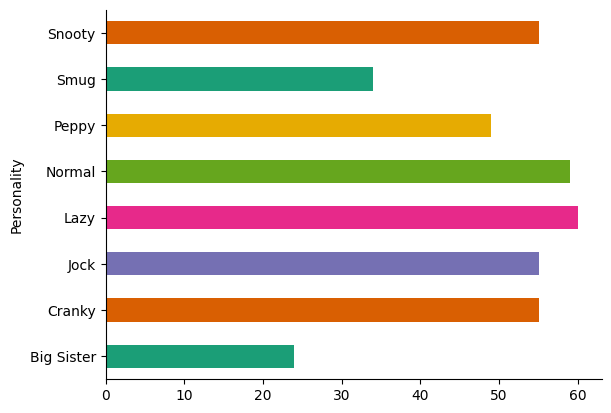

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
villagers_df.groupby('Personality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase FROM villagers_df WHERE species = 'Cat'")

┌──────────┬─────────┬─────────┬─────────────┬─────────────┐
│   Name   │ Gender  │ Species │ Personality │ Catchphrase │
│ varchar  │ varchar │ varchar │   varchar   │   varchar   │
├──────────┼─────────┼─────────┼─────────────┼─────────────┤
│ Ankha    │ Female  │ Cat     │ Snooty      │ me meow     │
│ Bob      │ Male    │ Cat     │ Lazy        │ pthhpth     │
│ Felicity │ Female  │ Cat     │ Peppy       │ mimimi      │
│ Kabuki   │ Male    │ Cat     │ Cranky      │ meooo-OH    │
│ Katt     │ Female  │ Cat     │ Big Sister  │ purrty      │
│ Kid Cat  │ Male    │ Cat     │ Jock        │ psst        │
│ Kiki     │ Female  │ Cat     │ Normal      │ kitty cat   │
│ Kitty    │ Female  │ Cat     │ Snooty      │ mrowrr      │
│ Lolly    │ Female  │ Cat     │ Normal      │ bonbon      │
│ Merry    │ Female  │ Cat     │ Peppy       │ mweee       │
│ Mitzi    │ Female  │ Cat     │ Normal      │ mew         │
│ Moe      │ Male    │ Cat     │ Lazy        │ myawn       │
│ Monique  │ Female  │ C

In [6]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase FROM villagers_df WHERE species = 'Cat' AND personality = 'Peppy'")

┌──────────┬─────────┬─────────┬─────────────┬─────────────┐
│   Name   │ Gender  │ Species │ Personality │ Catchphrase │
│ varchar  │ varchar │ varchar │   varchar   │   varchar   │
├──────────┼─────────┼─────────┼─────────────┼─────────────┤
│ Felicity │ Female  │ Cat     │ Peppy       │ mimimi      │
│ Merry    │ Female  │ Cat     │ Peppy       │ mweee       │
│ Rosie    │ Female  │ Cat     │ Peppy       │ silly       │
│ Tabby    │ Female  │ Cat     │ Peppy       │ me-WOW      │
│ Tangy    │ Female  │ Cat     │ Peppy       │ reeeeOWR    │
└──────────┴─────────┴─────────┴─────────────┴─────────────┘

In [7]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase FROM villagers_df WHERE species = 'Cat' AND name LIKE 'A%'")

┌─────────┬─────────┬─────────┬─────────────┬─────────────┐
│  Name   │ Gender  │ Species │ Personality │ Catchphrase │
│ varchar │ varchar │ varchar │   varchar   │   varchar   │
├─────────┼─────────┼─────────┼─────────────┼─────────────┤
│ Ankha   │ Female  │ Cat     │ Snooty      │ me meow     │
└─────────┴─────────┴─────────┴─────────────┴─────────────┘

In [8]:
duckdb.sql("SELECT personality, COUNT(*) AS personality_count FROM villagers_df GROUP BY personality")

┌─────────────┬───────────────────┐
│ Personality │ personality_count │
│   varchar   │       int64       │
├─────────────┼───────────────────┤
│ Cranky      │                55 │
│ Peppy       │                49 │
│ Big Sister  │                24 │
│ Lazy        │                60 │
│ Normal      │                59 │
│ Snooty      │                55 │
│ Smug        │                34 │
│ Jock        │                55 │
└─────────────┴───────────────────┘

In [10]:
duckdb.sql("SELECT personality, COUNT(*) AS personality_count, COUNT(*) * 100.0 / (SELECT COUNT(personality) FROM villagers_df ) AS personality_percentage FROM villagers_df GROUP BY personality ORDER BY personality_count ASC")

┌─────────────┬───────────────────┬────────────────────────┐
│ Personality │ personality_count │ personality_percentage │
│   varchar   │       int64       │         double         │
├─────────────┼───────────────────┼────────────────────────┤
│ Big Sister  │                24 │      6.138107416879795 │
│ Smug        │                34 │      8.695652173913043 │
│ Peppy       │                49 │     12.531969309462916 │
│ Cranky      │                55 │     14.066496163682864 │
│ Snooty      │                55 │     14.066496163682864 │
│ Jock        │                55 │     14.066496163682864 │
│ Normal      │                59 │     15.089514066496164 │
│ Lazy        │                60 │     15.345268542199488 │
└─────────────┴───────────────────┴────────────────────────┘

In [11]:
duckdb.sql("SELECT COUNT(*) * 100.0 / (SELECT COUNT(*) FROM villagers_df ) AS cranky_percentage FROM villagers_df WHERE personality = 'Cranky'")

┌────────────────────┐
│ cranky_percentage  │
│       double       │
├────────────────────┤
│ 14.066496163682864 │
└────────────────────┘

In [12]:
duckdb.sql("SELECT COUNT(*) * 100.0 / (SELECT COUNT(*) FROM villagers_df WHERE species = 'Cat') AS cat_cranky_percentage FROM villagers_df WHERE species = 'Cat' AND personality = 'Cranky'")

┌───────────────────────┐
│ cat_cranky_percentage │
│        double         │
├───────────────────────┤
│     8.695652173913043 │
└───────────────────────┘

In [13]:
duckdb.sql("SELECT personality, COUNT(*) AS cat_personality_count, COUNT(*) * 100.0 / (SELECT COUNT(personality) FROM villagers_df WHERE species = 'Cat') AS cat_personality_percentage FROM villagers_df WHERE species = 'Cat' GROUP BY personality ORDER BY cat_personality_count ASC")

┌─────────────┬───────────────────────┬────────────────────────────┐
│ Personality │ cat_personality_count │ cat_personality_percentage │
│   varchar   │         int64         │           double           │
├─────────────┼───────────────────────┼────────────────────────────┤
│ Big Sister  │                     1 │         4.3478260869565215 │
│ Smug        │                     1 │         4.3478260869565215 │
│ Cranky      │                     2 │          8.695652173913043 │
│ Lazy        │                     3 │         13.043478260869565 │
│ Normal      │                     3 │         13.043478260869565 │
│ Jock        │                     3 │         13.043478260869565 │
│ Snooty      │                     5 │          21.73913043478261 │
│ Peppy       │                     5 │          21.73913043478261 │
└─────────────┴───────────────────────┴────────────────────────────┘

In [14]:
duckdb.sql("SELECT COUNT(*) * 100.0 / (SELECT COUNT(*) FROM villagers_df ) AS alligator_percentage FROM villagers_df WHERE species = 'Alligator'")

┌──────────────────────┐
│ alligator_percentage │
│        double        │
├──────────────────────┤
│   1.7902813299232736 │
└──────────────────────┘

In [15]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase FROM villagers_df WHERE species = 'Alligator'")

┌─────────┬─────────┬───────────┬─────────────┬─────────────┐
│  Name   │ Gender  │  Species  │ Personality │ Catchphrase │
│ varchar │ varchar │  varchar  │   varchar   │   varchar   │
├─────────┼─────────┼───────────┼─────────────┼─────────────┤
│ Alfonso │ Male    │ Alligator │ Lazy        │ it'sa me    │
│ Alli    │ Female  │ Alligator │ Snooty      │ graaagh     │
│ Boots   │ Male    │ Alligator │ Jock        │ munchie     │
│ Del     │ Male    │ Alligator │ Cranky      │ gronk       │
│ Drago   │ Male    │ Alligator │ Lazy        │ burrrn      │
│ Gayle   │ Female  │ Alligator │ Normal      │ snacky      │
│ Sly     │ Male    │ Alligator │ Jock        │ hoo-rah     │
└─────────┴─────────┴───────────┴─────────────┴─────────────┘

In [16]:
duckdb.sql("SELECT name,species,personality,catchphrase FROM villagers_df ORDER BY species DESC")

┌──────────┬───────────┬─────────────┬─────────────┐
│   Name   │  Species  │ Personality │ Catchphrase │
│ varchar  │  varchar  │   varchar   │   varchar   │
├──────────┼───────────┼─────────────┼─────────────┤
│ Fang     │ Wolf      │ Cranky      │ cha-chomp   │
│ Chief    │ Wolf      │ Cranky      │ harrumph    │
│ Wolfgang │ Wolf      │ Cranky      │ snarrrl     │
│ Lobo     │ Wolf      │ Cranky      │ ah-rooooo   │
│ Whitney  │ Wolf      │ Snooty      │ snappy      │
│ Vivian   │ Wolf      │ Snooty      │ piffle      │
│ Kyle     │ Wolf      │ Smug        │ alpha       │
│ Dobie    │ Wolf      │ Cranky      │ ohmmm       │
│ Audie    │ Wolf      │ Peppy       │ foxtrot     │
│ Freya    │ Wolf      │ Snooty      │ uff da      │
│   ·      │  ·        │   ·         │   ·         │
│   ·      │  ·        │   ·         │   ·         │
│   ·      │  ·        │   ·         │   ·         │
│ Annalisa │ Anteater  │ Normal      │ gumdrop     │
│ Cyrano   │ Anteater  │ Cranky      │ ah-CHOO

In [17]:
duckdb.sql("SELECT name,species,personality,catchphrase FROM villagers_df WHERE species = 'Wolf'")

┌──────────┬─────────┬─────────────┬─────────────┐
│   Name   │ Species │ Personality │ Catchphrase │
│ varchar  │ varchar │   varchar   │   varchar   │
├──────────┼─────────┼─────────────┼─────────────┤
│ Audie    │ Wolf    │ Peppy       │ foxtrot     │
│ Chief    │ Wolf    │ Cranky      │ harrumph    │
│ Dobie    │ Wolf    │ Cranky      │ ohmmm       │
│ Fang     │ Wolf    │ Cranky      │ cha-chomp   │
│ Freya    │ Wolf    │ Snooty      │ uff da      │
│ Kyle     │ Wolf    │ Smug        │ alpha       │
│ Lobo     │ Wolf    │ Cranky      │ ah-rooooo   │
│ Skye     │ Wolf    │ Normal      │ airmail     │
│ Vivian   │ Wolf    │ Snooty      │ piffle      │
│ Whitney  │ Wolf    │ Snooty      │ snappy      │
│ Wolfgang │ Wolf    │ Cranky      │ snarrrl     │
├──────────┴─────────┴─────────────┴─────────────┤
│ 11 rows                              4 columns │
└────────────────────────────────────────────────┘

In [19]:
duckdb.sql("SELECT species, COUNT(*) AS species_count, COUNT(*) * 100.0 / (SELECT COUNT(species) FROM villagers_df ) AS species_percentage FROM villagers_df GROUP BY species ORDER BY species_count ASC")

┌───────────┬───────────────┬────────────────────┐
│  Species  │ species_count │ species_percentage │
│  varchar  │     int64     │       double       │
├───────────┼───────────────┼────────────────────┤
│ Octopus   │             3 │ 0.7672634271099744 │
│ Cow       │             4 │ 1.0230179028132993 │
│ Bull      │             6 │ 1.5345268542199488 │
│ Rhino     │             6 │ 1.5345268542199488 │
│ Anteater  │             7 │ 1.7902813299232736 │
│ Hippo     │             7 │ 1.7902813299232736 │
│ Lion      │             7 │ 1.7902813299232736 │
│ Alligator │             7 │ 1.7902813299232736 │
│ Tiger     │             7 │ 1.7902813299232736 │
│ Hamster   │             8 │ 2.0460358056265986 │
│   ·       │             · │          ·         │
│   ·       │             · │          ·         │
│   ·       │             · │          ·         │
│ Mouse     │            15 │  3.836317135549872 │
│ Horse     │            15 │  3.836317135549872 │
│ Bear      │            15 │  

In [20]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase,hobby FROM villagers_df WHERE hobby = 'Fitness' AND species = 'Gorilla' OR hobby = 'Fitness' AND species = 'Rabbit' ")

┌─────────┬─────────┬─────────┬─────────────┬─────────────────┬─────────┐
│  Name   │ Gender  │ Species │ Personality │   Catchphrase   │  Hobby  │
│ varchar │ varchar │ varchar │   varchar   │     varchar     │ varchar │
├─────────┼─────────┼─────────┼─────────────┼─────────────────┼─────────┤
│ Al      │ Male    │ Gorilla │ Lazy        │ ayyyeee         │ Fitness │
│ Boone   │ Male    │ Gorilla │ Jock        │ baboom          │ Fitness │
│ Boyd    │ Male    │ Gorilla │ Cranky      │ uh-oh           │ Fitness │
│ Cesar   │ Male    │ Gorilla │ Cranky      │ highness        │ Fitness │
│ Hans    │ Male    │ Gorilla │ Smug        │ groovy          │ Fitness │
│ Louie   │ Male    │ Gorilla │ Jock        │ hoo hoo ha      │ Fitness │
│ Peewee  │ Male    │ Gorilla │ Cranky      │ li'l bitty baby │ Fitness │
│ Rocket  │ Female  │ Gorilla │ Big Sister  │ vroom           │ Fitness │
│ Violet  │ Female  │ Gorilla │ Snooty      │ sweetie         │ Fitness │
│ Genji   │ Male    │ Rabbit  │ Jock  

In [21]:
duckdb.sql("SELECT name,species,'Furniture List' FROM villagers_df ")

┌──────────┬───────────┬──────────────────┐
│   Name   │  Species  │ 'Furniture List' │
│ varchar  │  varchar  │     varchar      │
├──────────┼───────────┼──────────────────┤
│ Admiral  │ Bird      │ Furniture List   │
│ Agent S  │ Squirrel  │ Furniture List   │
│ Agnes    │ Pig       │ Furniture List   │
│ Al       │ Gorilla   │ Furniture List   │
│ Alfonso  │ Alligator │ Furniture List   │
│ Alice    │ Koala     │ Furniture List   │
│ Alli     │ Alligator │ Furniture List   │
│ Amelia   │ Eagle     │ Furniture List   │
│ Anabelle │ Anteater  │ Furniture List   │
│ Anchovy  │ Bird      │ Furniture List   │
│    ·     │  ·        │       ·          │
│    ·     │  ·        │       ·          │
│    ·     │  ·        │       ·          │
│ Wart Jr. │ Frog      │ Furniture List   │
│ Weber    │ Duck      │ Furniture List   │
│ Wendy    │ Sheep     │ Furniture List   │
│ Whitney  │ Wolf      │ Furniture List   │
│ Willow   │ Sheep     │ Furniture List   │
│ Winnie   │ Horse     │ Furnitu

In [45]:
duckdb.sql("SELECT * FROM villagers_df ")
print(villagers_df.columns)
print(villagers_df.describe())
print(villagers_df.shape)

Index(['name', 'species', 'gender', 'personality', 'hobby', 'birthday',
       'catchphrase', 'favorite_song', 'style_1', 'style_2', 'color_1',
       'color_2', 'wallpaper', 'flooring', 'furniture_list', 'filename',
       'unique_entry_id'],
      dtype='object')
           name species gender personality   hobby birthday catchphrase  \
count       391     391    391         391     391      391         391   
unique      391      35      2           8       6      361         388   
top     Admiral     Cat   Male        Lazy  Nature   27-Jan     sweetie   
freq          1      23    204          60      66        2           2   

       favorite_song style_1 style_2 color_1 color_2            wallpaper  \
count            391     391     391     391     391                  391   
unique            89       6       6      14      14                  154   
top      Forest Life  Simple  Simple   Black     Red  backyard-fence wall   
freq              15     118     110      47      

In [23]:
duckdb.sql("SELECT DISTINCT name,interact, FROM housewares_df WHERE DIY = 'Yes' ")

┌────────────────────────┬──────────┐
│          Name          │ Interact │
│        varchar         │ varchar  │
├────────────────────────┼──────────┤
│ angled signpost        │ No       │
│ apple chair            │ Yes      │
│ Aquarius urn           │ No       │
│ asteroid               │ Yes      │
│ bamboo bench           │ Yes      │
│ bamboo doll            │ Yes      │
│ bamboo noodle slide    │ Yes      │
│ beekeeper's hive       │ No       │
│ birdbath               │ No       │
│ bonfire                │ Yes      │
│    ·                   │ ·        │
│    ·                   │ ·        │
│    ·                   │ ·        │
│ wooden table           │ No       │
│ wooden waste bin       │ Trash    │
│ wooden waste bin       │ Yes      │
│ wooden-block bed       │ Yes      │
│ wooden-block bench     │ Yes      │
│ wooden-block bookshelf │ No       │
│ wooden-block chest     │ Wardrobe │
│ wooden-block stereo    │ Yes      │
│ wooden-block stool     │ Yes      │
│ yellow-lea

In [24]:
duckdb.sql("SELECT DISTINCT name, FROM housewares_df WHERE DIY = 'Yes' AND interact = 'Yes'")

┌───────────────────────────┐
│           Name            │
│          varchar          │
├───────────────────────────┤
│ acoustic guitar           │
│ bamboo bench              │
│ bamboo noodle slide       │
│ big festive tree          │
│ birdcage                  │
│ bonfire                   │
│ brick oven                │
│ Bunny Day stool           │
│ cardboard bed             │
│ cardboard chair           │
│        ·                  │
│        ·                  │
│        ·                  │
│ tulip surprise box        │
│ Virgo harp                │
│ water pump                │
│ wild log bench            │
│ wooden full-length mirror │
│ wooden simple bed         │
│ wooden waste bin          │
│ wooden-block bench        │
│ wooden-block stool        │
│ yellow-leaf pile          │
├───────────────────────────┤
│    110 rows (20 shown)    │
└───────────────────────────┘

In [54]:
duckdb.sql("SELECT name,species,personality,catchphrase, birthday,flooring,favorite_song FROM villagers_df WHERE name = 'Al' OR name = 'Audie' OR name ='Marina' OR name ='Renée' OR name = 'Flora' OR name = 'Lobo' OR name ='Bob' OR name = 'Mint' OR name = 'Snake' ORDER BY personality ASC")

┌─────────┬──────────┬─────────────┬─────────────┬──────────┬───────────────────────────┬───────────────┐
│  name   │ species  │ personality │ catchphrase │ birthday │         flooring          │ favorite_song │
│ varchar │ varchar  │   varchar   │   varchar   │ varchar  │          varchar          │    varchar    │
├─────────┼──────────┼─────────────┼─────────────┼──────────┼───────────────────────────┼───────────────┤
│ Renée   │ Rhino    │ Big Sister  │ yo yo yo    │ 28-May   │ tiger-print flooring      │ Surfin' K.K.  │
│ Lobo    │ Wolf     │ Cranky      │ ah-rooooo   │ 5-Nov    │ rosewood flooring         │ K.K. Rock     │
│ Snake   │ Rabbit   │ Jock        │ bunyip      │ 3-Nov    │ dirt flooring             │ King K.K.     │
│ Al      │ Gorilla  │ Lazy        │ ayyyeee     │ 18-Oct   │ green rubber flooring     │ Go K.K. Rider │
│ Bob     │ Cat      │ Lazy        │ pthhpth     │ 1-Jan    │ colorful puzzle flooring  │ Neapolitan    │
│ Marina  │ Octopus  │ Normal      │ blurp    